___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings. 

Also you will learn what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** package. 

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with the Random Forest, Gradient Boosting Descent, KNN algorithms.

At the end of the project, you will have the opportunity to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This tutorial assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind K-Means, Gradient Boosting Descent, KNN, Random Forest, and Confusion Matrices.



# #Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques. 

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Label Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms. you are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. 

The purpose of clustering analysis is to cluster data with similar characteristics. You are asked to use the ***K-means*** algorithm to make cluster analysis. However, you must provide the K-means algorithm with information about the number of clusters it will make predictions. Also, the data you apply to the K-means algorithm must be scaled. In order to find the optimal number of clusters, you are asked to use the ***Elbow method***. Briefly, try to predict the set to which individuals are related by using K-means and evaluate the estimation results.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set. 

Try to make your predictions by using the algorithms ***Gradient Boosting Classifier***, ***K Neighbors Classifier***, ***Random Forest Classifier***. You can use the related modules of the ***scikit-learn*** library. You can use scikit-learn ***Confusion Metrics*** module for accuracy calculation. You can use the ***Yellowbrick*** module for model selection and visualization.

In the final step, you will deploy your model using Streamlit tool.



# #Tasks

#### 1. Exploratory Data Analysis
- Importing Modules
- Loading Dataset
- Data Insigts

#### 2. Data Visualization
- Employees Left
- Determine Number of Projects
- Determine Time Spent in Company
- Subplots of Features

#### 3. Data Pre-Processing
- Scaling
- Label Encoding

#### 4. Cluster Analysis
- Find the optimal number of clusters (k) using the elbow method for for K-means.
- Determine the clusters by using K-Means then Evaluate predicted results.

#### 5. Model Building
- Split Data as Train and Test set
- Built Gradient Boosting Classifier, Evaluate Model Performance and Predict Test Data
- Built K Neighbors Classifier and Evaluate Model Performance and Predict Test Data
- Built Random Forest Classifier and Evaluate Model Performance and Predict Test Data

#### 6. Model Deployement

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 

## 1. Exploratory Data Analysis

Exploratory Data Analysis is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

### Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Loading Dataset

Let's first load the required HR dataset using pandas's "read_csv" function.

In [2]:
df=pd.read_csv('HR_Dataset.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
def explain(attribute):
    features= {'satisfaction_level': "It is employee satisfaction point, which ranges from 0-1.",
    'last_evaluation': 'It is evaluated performance by the employer, which also ranges from 0-1.',
    'number_projects': 'How many of projects assigned to an employee?',
    'average_monthly_hours': 'How many hours in averega an employee worked in a month?',
    'time_spent_company': 'time_spent_company means employee experience. The number of years spent by an employee in the company.',
    'work_accident': 'Whether an employee has had a work accident or not.',
    'promotion_last_5years': 'Whether an employee has had a promotion in the last 5 years or not.',
    'Departments': "Employee's working department/division.",
    'Salary': "Salary level of the employee such as low, medium and high.",
    'left': "Whether the employee has left the company or not."}
    return features[attribute]

### Data Insights

In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics. Here, you can find the average of both the groups using groupby() and mean() function.

In [4]:
df.duplicated().value_counts()

False    11991
True      3008
dtype: int64

In [5]:
# df=df.drop_duplicates()

* Model drop_dublicate yapildigi zaman model basarisi dustugu gozlendi. Bu nedenle, dublicate observation drop edilmeden devam etme tercih edildi.

In [6]:
def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str

# display(summary(df).sort_values(by='Nulls', ascending=False))

In [7]:
summary(df)

Data shape: (14999, 10)
___________________________
Data Types:
int64      6
float64    2
object     2
Name: Types, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
Departments,object,14999,10,0,IT,technical
Work_accident,int64,14999,2,0,0,1
average_montly_hours,int64,14999,215,0,96,310
last_evaluation,float64,14999,65,0,0.36,1.0
left,int64,14999,2,0,0,1
number_project,int64,14999,6,0,2,7
promotion_last_5years,int64,14999,2,0,0,1
salary,object,14999,3,0,high,medium
satisfaction_level,float64,14999,92,0,0.09,1.0
time_spend_company,int64,14999,8,0,2,10


In [8]:
df=df.rename({'Departments ':'Departments'},axis=1)

In [9]:
print('Unique Values of Each Features:\n')
for i in df:
    print(f'{i}:\n{sorted(df[i].unique())}\n')

Unique Values of Each Features:

satisfaction_level:
[0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]

last_evaluation:
[0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]

n

In [10]:
def perc_col(df,col):
    for i in sorted(df[col].unique(),reverse=True):
        print('%s: %%%.2f' % (i, 100*df[col].value_counts()[i]/len(df)))

perc_col(df,'left')

1: %23.81
0: %76.19


* Unbalanced data set

## 2. Data Visualization

You can search for answers to the following questions using data visualization methods. Based on these responses, you can develop comments about the factors that cause churn.
- How does the promotion status affect employee churn?
- How does years of experience affect employee churn?
- How does workload affect employee churn?
- How does the salary level affect employee churn?

<Figure size 1080x1080 with 0 Axes>

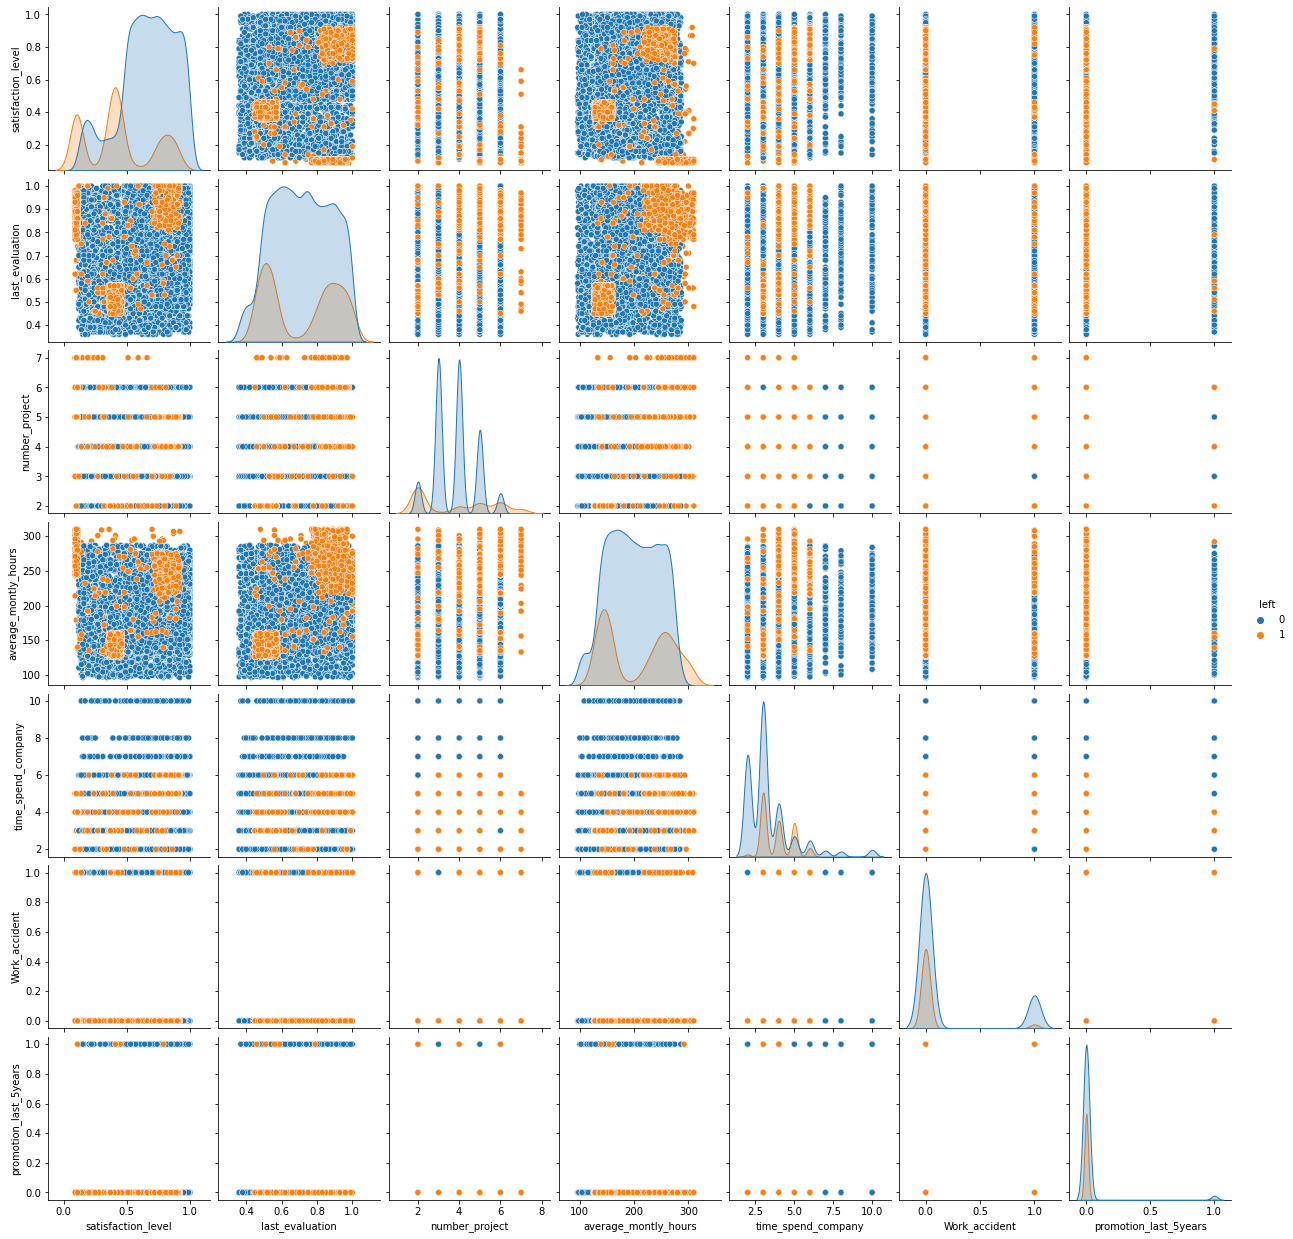

In [26]:
sns.pairplot(df.drop(['Departments','salary'],axis=1),hue='left');

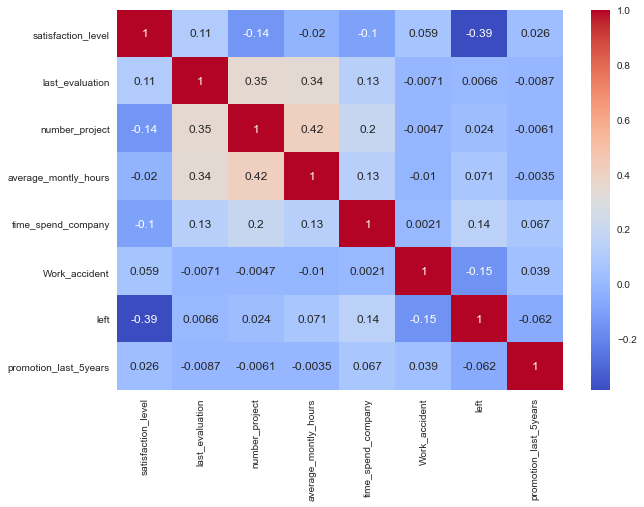

In [823]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True, cmap="coolwarm");

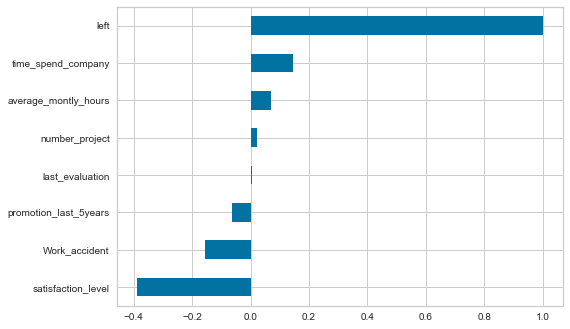

In [824]:
df.corr()["left"].sort_values().plot.barh();

* Work_accident ile left arasinda hem dusuk hemde negatif bir korelasyon olmasi beklenmeyen bir durum.

salary,low,medium,high
left,29.70,20.40,6.60


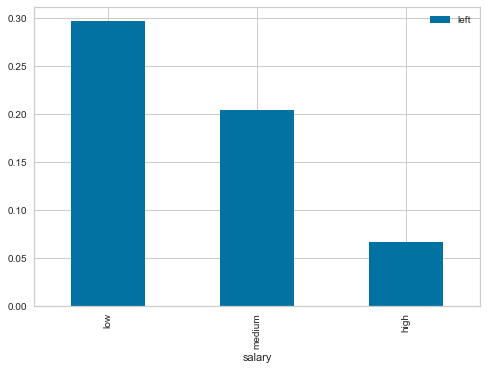

In [825]:
# Churn ratio of employee by departments
pd.DataFrame(df.groupby('salary')['left'].mean()).sort_values('left',ascending=False).plot(kind='bar')
pd.DataFrame(df.groupby('salary')['left'].mean()).sort_values('left',ascending=False).round(3).T*100

> Churn rate te salary nin cok etkili oldugu goruluyor.

Departments,hr,accounting,technical,support,sales,marketing,IT,product_mng,RandD,management
left,29.10,26.60,25.60,24.90,24.50,23.70,22.20,22.00,15.40,14.40


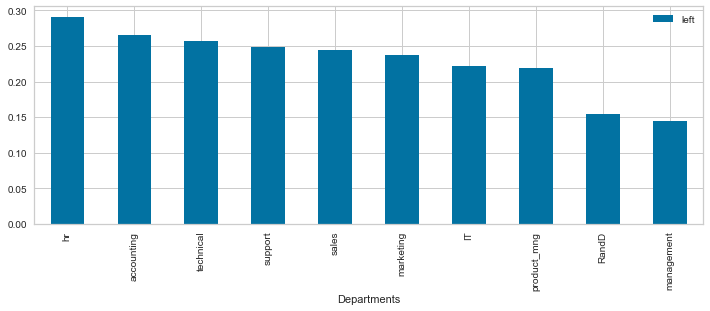

In [826]:
# Churn ratio of employee by departments
pd.DataFrame(df.groupby('Departments')['left'].mean()).sort_values('left',ascending=False).plot(kind='bar',figsize=(12,4))
pd.DataFrame(df.groupby('Departments')['left'].mean()).sort_values('left',ascending=False).round(3).T*100

* hr: 'Human Resources'
* RandD: 'Research and Development'

> Ustteki grafigin maas segmenti kirilimlarina bakalim

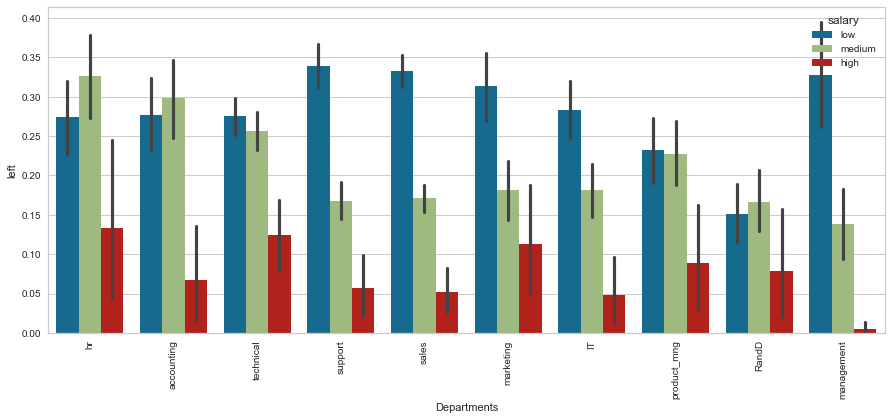

In [827]:
plt.figure(figsize=(15,6))
result = df.groupby(["Departments"])['left'].aggregate(np.mean).reset_index().sort_values('left',ascending=False)
sns.barplot(x='Departments', y="left", data=df, hue='salary',order=result['Departments'])
plt.xticks(rotation=90)
plt.show()

> Maas segmentinin churn uzerinde etkisi goruluyor, daha kucuk ayrintilari yakalamak icin, salary segmentine gore gruplayip gorsellestirelim

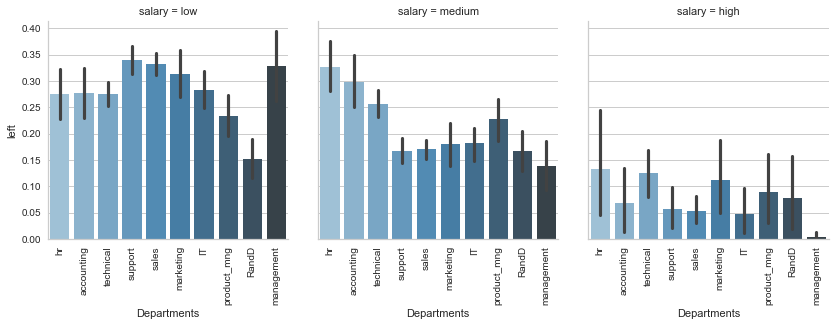

In [828]:
g = sns.FacetGrid(df,col='salary',height=4)
ax = g.map(sns.barplot, "Departments", "left", palette = "Blues_d", order=result['Departments'])
ax.set_xticklabels(rotation = 90);

* Churt oranini etkileyen en buyuk motivasyonun maas segmenti oldugu goruluyor. 
* Bu motivasyonun departmana gore etkisi degisebiliyor. HR, Accounting ve RanD taki churn rate dususu daha smoote iken, management icin daha keskin bir dusus soz konusu.

### Employees Left

Let's check how many employees were left?
Here, you can plot a bar graph using Matplotlib. The bar graph is suitable for showing discrete variable counts.

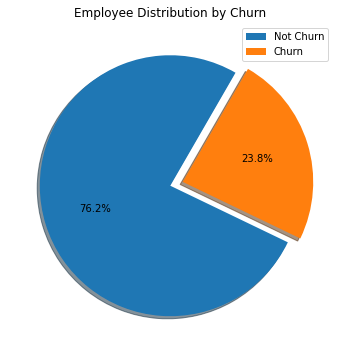

In [27]:
plt.figure(figsize=(6,6))

explode = [0,0.1]
plt.pie(df['left'].value_counts(),explode=explode,autopct='%1.1f%%',shadow=True,startangle=60)
plt.legend(labels=['Not Churn','Churn'])
plt.title('Employee Distribution by Churn')
plt.axis('off')
plt.show()

### Number of Projects

Similarly, you can also plot a bar graph to count the number of employees deployed on how many projects?

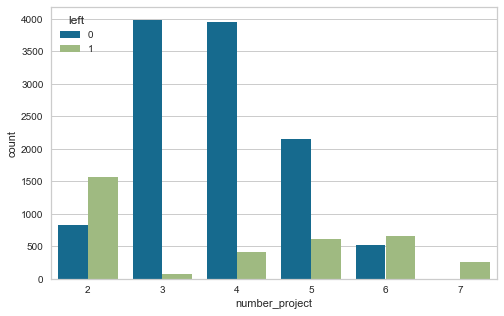

In [830]:
plt.figure(figsize=(8,5))
sns.countplot(x='number_project', data=df, hue='left');

* Employee nin calistigi proje sayisinda optimum deger 3. Bu sayinin artmasi veya azalmasi churn oranini artiriyor.

### Time Spent in Company

Similarly, you can also plot a bar graph to count the number of employees have based on how much experience?


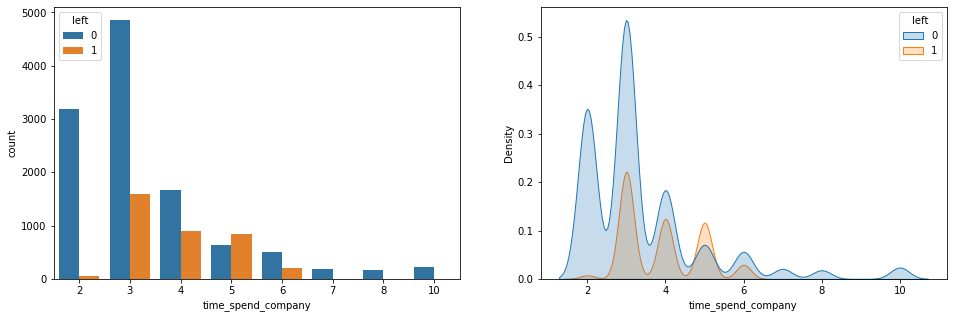

In [29]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.countplot(x='time_spend_company', data=df, hue='left')
plt.subplot(122)
sns.kdeplot(df['time_spend_company'], hue=df['left'], shade=True)
plt.show()

### Subplots of Features

You can use the methods of the matplotlib.

**satisfaction_level**

Departments,management,RandD,product_mng,marketing,support,IT,sales,technical,hr,accounting
satisfaction_level,62.10,62.00,62.00,61.90,61.80,61.80,61.40,60.80,59.90,58.20


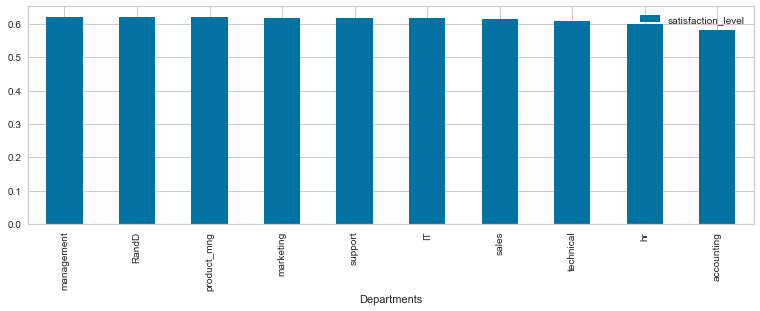

In [832]:
pd.DataFrame(df.groupby('Departments').satisfaction_level.mean()).sort_values('satisfaction_level',ascending=False).plot(kind='bar',figsize=(13,4))
pd.DataFrame(df.groupby('Departments').satisfaction_level.mean()).sort_values('satisfaction_level',ascending=False).T.round(3)*100

> satisfaction_level departmanlar arasinda dramatik farkliliklar gostermiyor.

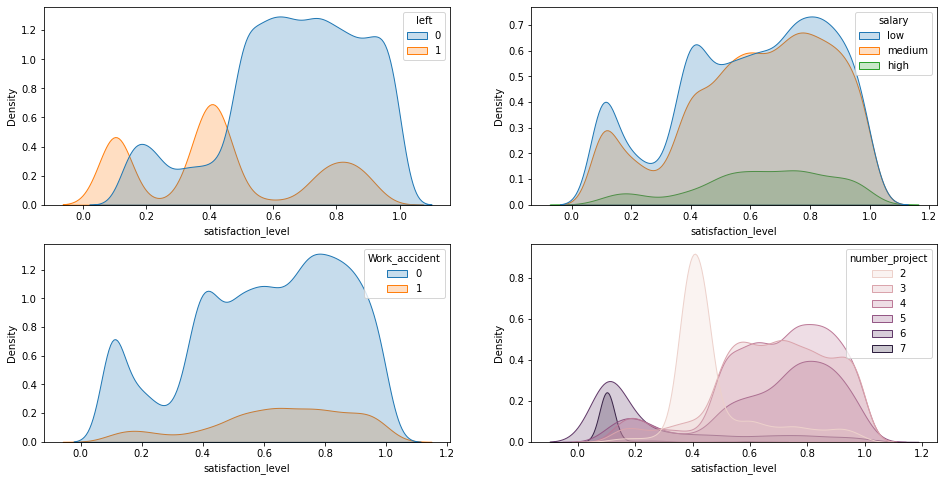

In [28]:
plt.figure(figsize=(16,8))
plt.subplot(221)
sns.kdeplot(df['satisfaction_level'], hue=df['left'], shade=True)
plt.subplot(222)
sns.kdeplot(df['satisfaction_level'], hue=df['salary'], shade=True)
plt.subplot(223)
sns.kdeplot(df['satisfaction_level'], hue=df['Work_accident'], shade=True)
plt.subplot(224)
sns.kdeplot(df['satisfaction_level'], hue=df['number_project'], shade=True)
plt.show()

> Churm Employees in satisfaction_level i beklendigi uzere daha dusuk.

> Number of Project e gore satisfaction_level degiskenlik gosteriyor, Bunun alt kirilimlarina bakarak verinin kilcallarinda gezinelim!

**last_evaluation**

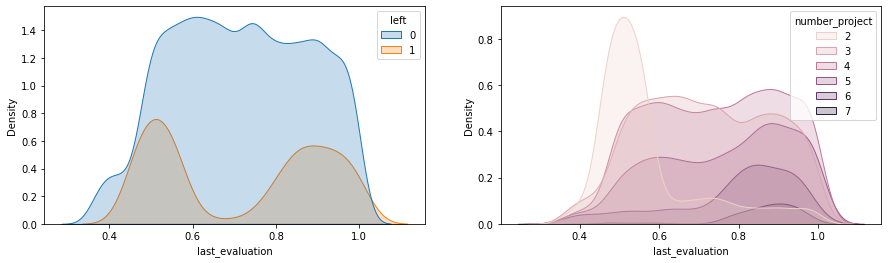

In [30]:
plt.figure(figsize=(15,4))
plt.subplot(121)
sns.kdeplot(df['last_evaluation'], hue=df['left'], shade=True)

plt.subplot(122)
sns.kdeplot(df['last_evaluation'], hue=df['number_project'], shade=True)
plt.show()

> Isverenin puanladigi employees(last_evaluation) icinden ya cok yuksek ya da dusuk puanlama alanlar, churn olmus. 

> Isveren fazla proje uzerinde calisanlara beklendigi uzere yuksek puan vermis.

**average_montly_hours**

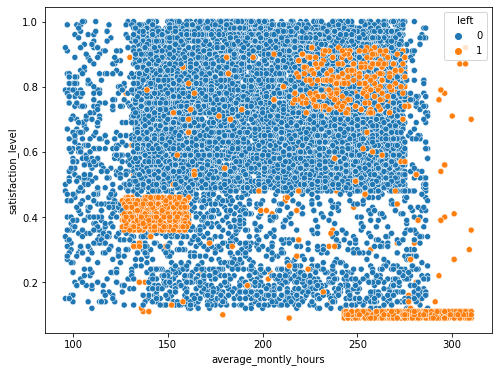

In [31]:
plt.figure(figsize=(8,6))
sns.scatterplot(df['average_montly_hours'], df['satisfaction_level'],hue=df['left']);

> 3 farkli cluster zone goruluyor. Bunlarin alt kirilimlarina bakalim.

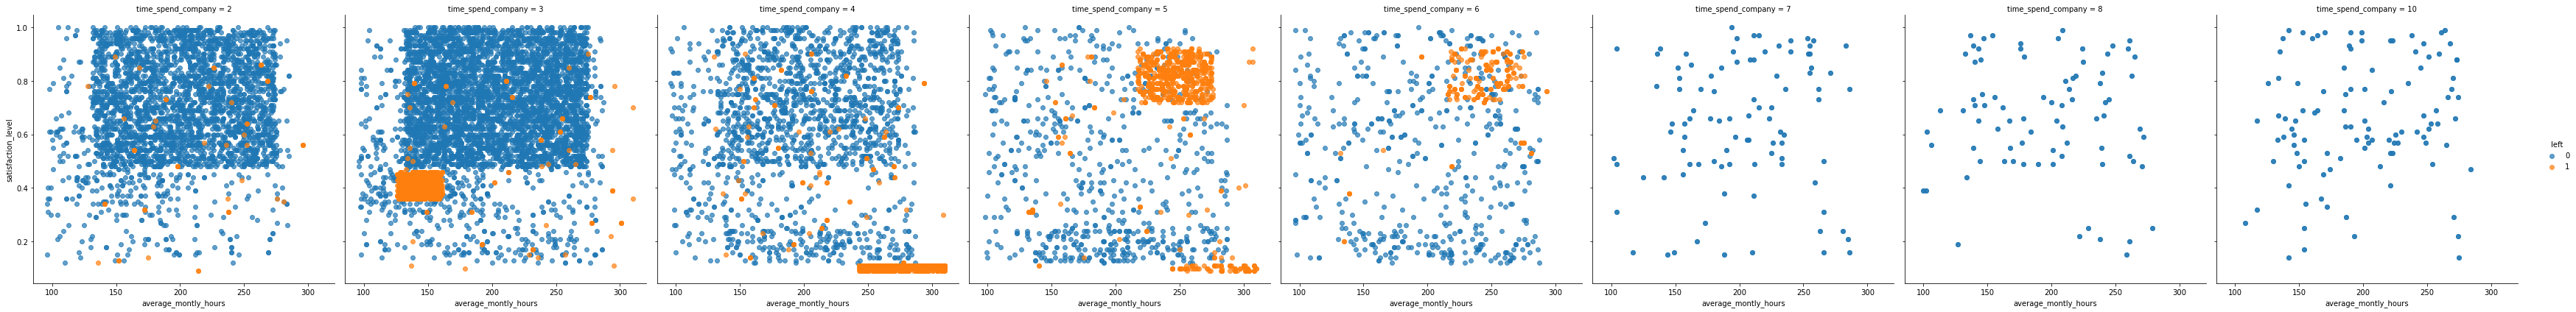

In [32]:
g=sns.FacetGrid(df,col='time_spend_company', hue='left',height=6)
g.map(plt.scatter, 'average_montly_hours', 'satisfaction_level', alpha=0.7)
g.add_legend();

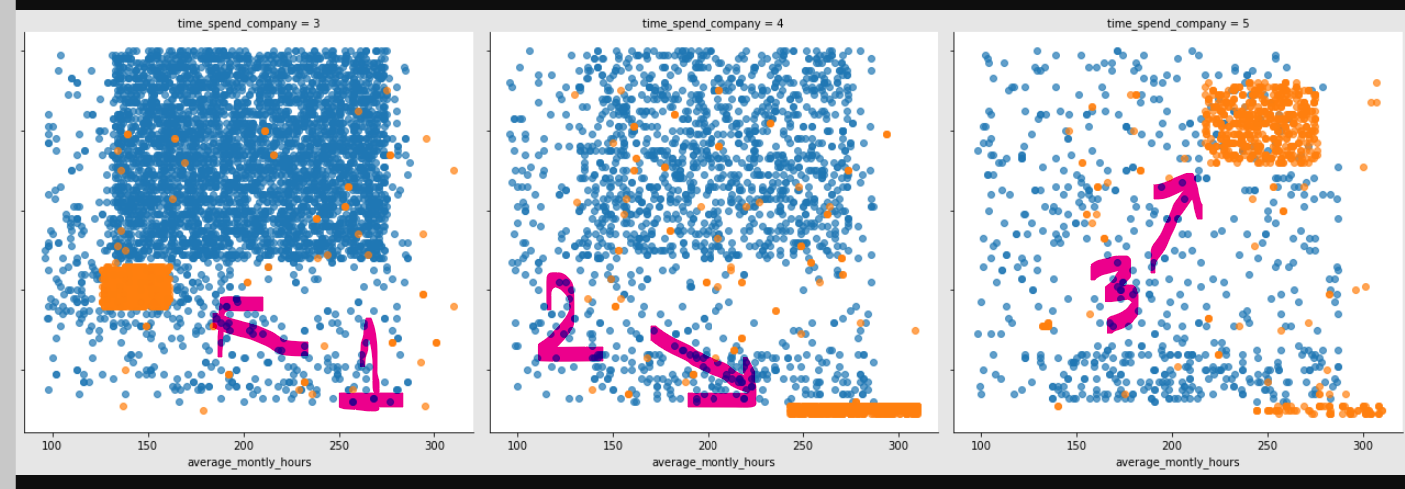
> 3 cluster zone da belirleyici olan, "time_spend_company" feature i oldugu goruluyor

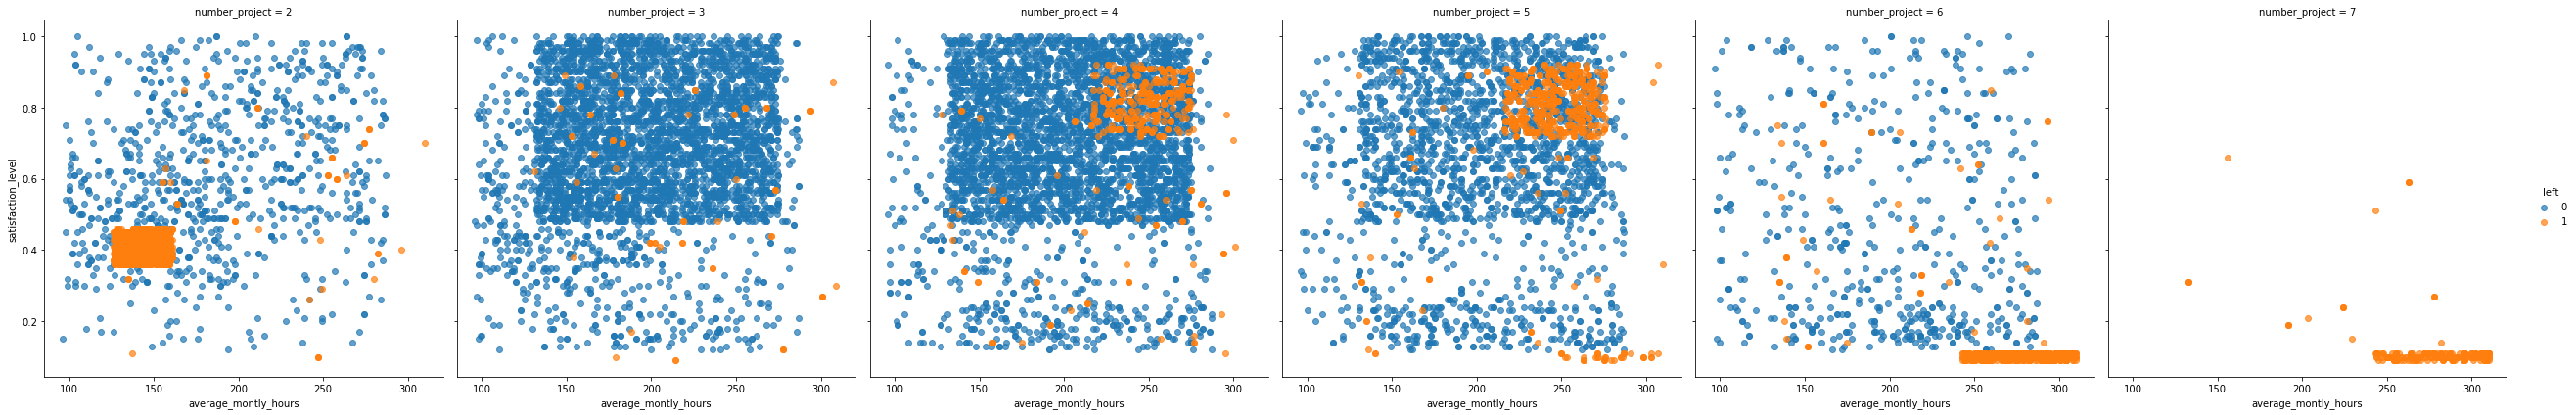

In [33]:
g=sns.FacetGrid(df,col='number_project', hue='left',height=6)
g.map(plt.scatter, 'average_montly_hours', 'satisfaction_level', alpha=0.7)
g.add_legend();

> number_project=2 >> 1.cluster

> number_project=4,5 >> 2.cluster

> number_project=6,7 >> 3.cluster da kumelenmis

> ML Modeling yapmadan data nin 3 clustera bolunecegini gormus olduk.

### Handling Outliers

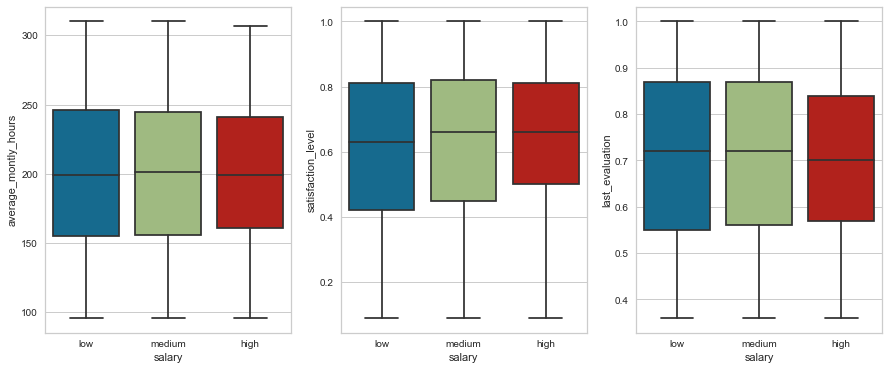

In [838]:
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
sns.boxplot(df['salary'], df['average_montly_hours'])

plt.subplot(1,3,2)
sns.boxplot(df['salary'], df['satisfaction_level'])

plt.subplot(1,3,3)
sns.boxplot(df['salary'], df['last_evaluation'])
plt.show()

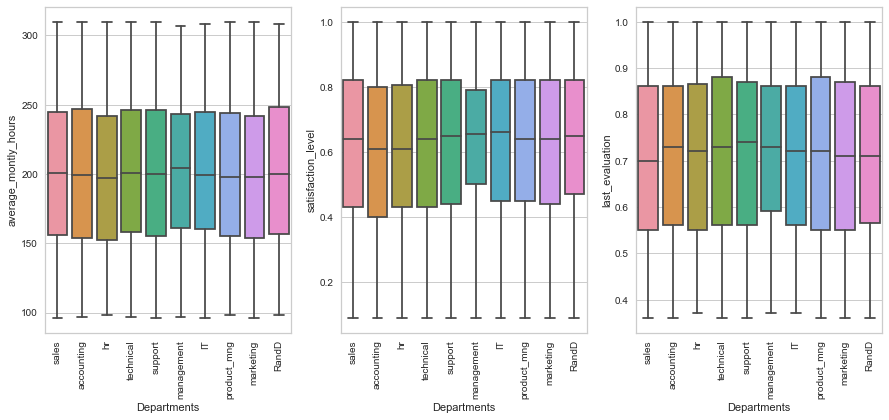

In [839]:
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
sns.boxplot(df['Departments'], df['average_montly_hours'])
plt.xticks(rotation=90)

plt.subplot(1,3,2)
sns.boxplot(df['Departments'], df['satisfaction_level'])
plt.xticks(rotation=90)

plt.subplot(1,3,3)
sns.boxplot(df['Departments'], df['last_evaluation'])
plt.xticks(rotation=90)
plt.show()

> There is no outlier in dataset.

## 3. Data Pre-Processing

#### Label Encoding

Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column. In order to encode this data, you could map each value to a number. e.g. Salary column's value can be represented as low:0, medium:1, and high:2. This process is known as label encoding, and sklearn conveniently will do this for you using LabelEncoder.



In [840]:
df[['Departments','salary']].sample(5)

,Departments,salary
8929,RandD,low
932,sales,medium
284,support,low
8195,accounting,medium
1187,technical,low


In [841]:
from sklearn.preprocessing import LabelEncoder
df['Departments']=LabelEncoder().fit_transform(df[['Departments']])
df['salary']=LabelEncoder().fit_transform(df[['salary']])

#### Scaling

Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Also distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

Scaling Types:
- Normalization: Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

- Standardization: Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

    

In [842]:
# Scaling gerektiren ML modelleri icin df_scaled olusturalim
from sklearn.preprocessing import StandardScaler
df_scaled = pd.DataFrame(StandardScaler().fit_transform(df),
                         columns=df.columns)
df_scaled.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,-0.94,-1.09,-1.46,-0.88,-0.34,-0.41,1.79,-0.15,0.39,-0.55
1,0.75,0.84,0.97,1.22,1.71,-0.41,1.79,-0.15,0.39,1.04
2,-2.02,0.96,2.59,1.42,0.34,-0.41,1.79,-0.15,0.39,1.04
3,0.43,0.90,0.97,0.44,1.03,-0.41,1.79,-0.15,0.39,-0.55
4,-0.98,-1.15,-1.46,-0.84,-0.34,-0.41,1.79,-0.15,0.39,-0.55


* Salary ve Department in churn rate uzerinde en etkili iki feature oldugunu, descriptin analysis yaparken tespit etmistik. 
* Genel anlamda Clustering algoritmalarinda categoric features kullanilmasi tercih edilmez.
* Cunku modeller, clustering islemini ortalamalar ve distance temelinde yapar.

.## 4. Cluster Analysis

- Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning.

    [Cluster Analysis](https://en.wikipedia.org/wiki/Cluster_analysis)

    [Cluster Analysis2](https://realpython.com/k-means-clustering-python/)

#### The Elbow Method

- "Elbow Method" can be used to find the optimum number of clusters in cluster analysis. The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. If k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

    [The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)

    [The Elbow Method2](https://medium.com/@mudgalvivek2911/machine-learning-clustering-elbow-method-4e8c2b404a5d)

    [KMeans](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)

Let's find out the groups of employees who left. You can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

## **EXTRA**
* Target feature i atip, Kmeans 2 farkli cluster olusturuyor mu, deneyelim.

In [843]:
df_kmeans=df_scaled.drop('left',axis=1)

In [844]:
from sklearn.cluster import KMeans
from pyclustertend import hopkins
from sklearn.metrics import silhouette_score

hopkins(df_kmeans,df_kmeans.shape[0])

0.11224246172215614

In [845]:
ssd = []
K = range(2,10)
for k in K:
    kmeans = KMeans(n_clusters = k).fit((df_kmeans))
    ssd.append(kmeans.inertia_)

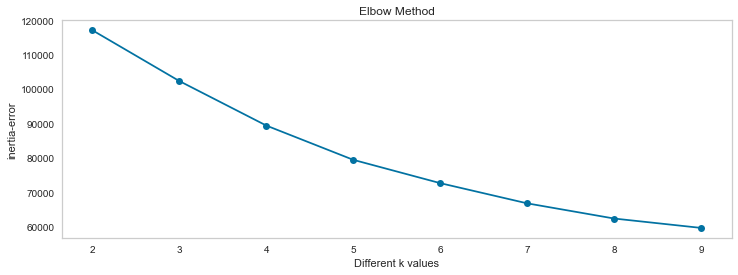

In [846]:
plt.figure(figsize=(12,4))
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("Elbow Method")
plt.grid()
plt.show()

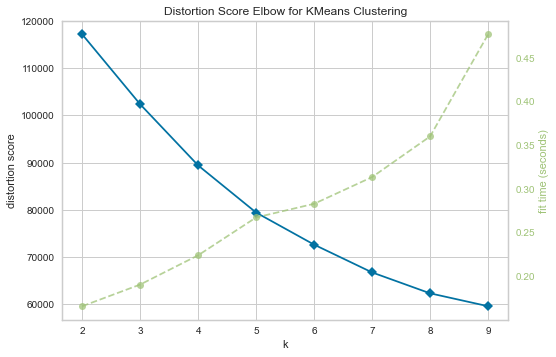

In [847]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(df_kmeans)
visu.show();

In [848]:
ssd =[]

K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(df_kmeans)
    ssd.append(model.inertia_)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df_kmeans, model.labels_)}')

Silhouette Score for 2 clusters: 0.15429552110468137
Silhouette Score for 3 clusters: 0.16153156791550355
Silhouette Score for 4 clusters: 0.18762131178161753
Silhouette Score for 5 clusters: 0.19261884105306445
Silhouette Score for 6 clusters: 0.19779675574134664
Silhouette Score for 7 clusters: 0.20425543943972518
Silhouette Score for 8 clusters: 0.19728962805111164
Silhouette Score for 9 clusters: 0.19647422821903726


* KMeans clustera ayirma islemini dogrusal yaptigi icin bu data setini clustera basarili bolemiyor. yellowbrick k degeri vermedi ve silhoutte score lari dusuk cikti. 
* Bu data setinde dairesel clustering yapabilen DBSCAN kullanilirsa basarili olabilir.

## 5. Model Building

### Split Data as Train and Test Set

Here, Dataset is broken into two parts in ratio of 70:30. It means 70% data will used for model training and 30% for model testing.

In [849]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN

In [850]:
X=df.drop('left',axis=1)
y=df.left
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=42) # stratify=y

In [851]:
y_train.value_counts()

0    8000
1    2499
Name: left, dtype: int64

#### SMOTE

In [852]:
# sm = SMOTE(random_state=42)
# X_smote, y_smote = sm.fit_sample(X_train, y_train)
# y_smote.value_counts()

#### ADASYN

In [853]:
# ad = ADASYN(random_state=42)
# X_adasyn, y_adasyn = ad.fit_sample(X_train, y_train)
# y_adasyn.value_counts()

In [854]:
# SMOTE
# X_train, y_train = X_smote, y_smote

# ADASYN
# X_train, y_train = X_adasyn, y_adasyn

* Oversampling yapmak Evaluation score larini iyilestirmiyor. Aksine score larin 1 puan dusmesine sebep oluyor.

### Lazy Predict

In [855]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit (X_train, X_test, y_train, y_test)
models

 90%|█████████████████████████████████████████████████████████████████████████▊        | 27/30 [00:12<00:00,  3.04it/s]

[20:37:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:13<00:00,  2.27it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.99,0.98,0.98,0.99,0.77
BaggingClassifier,0.98,0.97,0.97,0.98,0.20
XGBClassifier,0.98,0.97,0.97,0.98,0.22
ExtraTreesClassifier,0.98,0.97,0.97,0.98,0.53
LGBMClassifier,0.98,0.97,0.97,0.98,0.13
DecisionTreeClassifier,0.97,0.97,0.97,0.97,0.05
LabelSpreading,0.97,0.96,0.96,0.97,4.26
LabelPropagation,0.97,0.96,0.96,0.97,3.08
ExtraTreeClassifier,0.96,0.96,0.96,0.97,0.03


* Lazy predict default degerlerle egitilmis modelin evaluation score larini verir. 
* Gradient Boosting Classifier, XGBoost, Random Forest ve KNN ile model egitecegiz. KNN de scale edilimis datanin kullanilmasi gerekmektedir. 

# `1.Gradient Boosting Classifier`

- Confusion Matrix : You can use scikit-learn metrics module for accuracy calculation. A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

    [Confusion Matrix](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/)

- Yellowbrick: Yellowbrick is a suite of visualization and diagnostic tools that will enable quicker model selection. It’s a Python package that combines scikit-learn and matplotlib. Some of the more popular visualization tools include model selection, feature visualization, classification and regression visualization

    [Yellowbrick](https://www.analyticsvidhya.com/blog/2018/05/yellowbrick-a-set-of-visualization-tools-to-accelerate-your-model-selection-process/)

#### Model Building

In [856]:
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
from sklearn.metrics import accuracy_score,f1_score, recall_score, classification_report,confusion_matrix,precision_score,roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit, GridSearchCV, RandomizedSearchCV

In [857]:
gbc = GradientBoostingClassifier().fit(X_train, y_train)
y_pred = gbc.predict(X_test)

#### Evaluating Model Performance

In [858]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[3385   43]
[ 85 987]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3428
           1       0.96      0.92      0.94      1072

    accuracy                           0.97      4500
   macro avg       0.97      0.95      0.96      4500
weighted avg       0.97      0.97      0.97      4500



In [859]:
gbc_accuracy = accuracy_score(y_test, y_pred)
gbc_f1_score = f1_score(y_test, y_pred, average='weighted')
gbc_recall = recall_score(y_test, y_pred, average='weighted')
print('gbc_accuracy:',gbc_accuracy,
      '\ngbc_f1_score:',gbc_f1_score,
      '\ngbc_recall:',gbc_recall)

gbc_accuracy: 0.9715555555555555 
gbc_f1_score: 0.9713579769011802 
gbc_recall: 0.9715555555555555


#### Tunning

In [860]:
gbc = GradientBoostingClassifier()

In [861]:
gbc_params = {"n_estimators": [50,100,300],
             "subsample":[0.1,0.5,1],
             "max_depth":[3,7,9],
             "learning_rate":[0.1,0.01,0.3]}

In [862]:
# gbc_grid= GridSearchCV(gbc, gbc_params, cv = 5, 
#                             n_jobs = -1, verbose = 2).fit(X_train, y_train)

In [863]:
# gbc_grid= RandomizedSearchCV(gbc, gbc_params, cv = 5,
#                              n_iter=10,
#                             n_jobs = -1, verbose = 2,scoring='f1').fit(X_train, y_train)

In [864]:
# gbc_grid.best_params_

In [865]:
# gbc_tuned = GradientBoostingClassifier(learning_rate= 0.1, 
#                         max_depth= 9, 
#                         n_estimators= 300, 
#                         subsample= 0.5).fit(X_train, y_train)

# y_pred = gbc_tuned.predict(X_test)

In [866]:
gbc_tuned = GradientBoostingClassifier(learning_rate= 0.5, 
                        max_depth= 9, 
                        n_estimators= 300, 
                        subsample= 1).fit(X_train, y_train)

y_pred = gbc_tuned.predict(X_test)

In [867]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[3419    9]
[  49 1023]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3428
           1       0.99      0.95      0.97      1072

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



In [868]:
gbc_accuracy = accuracy_score(y_test, y_pred)
gbc_f1_score = f1_score(y_test, y_pred, average='weighted')
gbc_recall = recall_score(y_test, y_pred, average='weighted')
print('gbc_accuracy:',gbc_accuracy,
      '\ngbc_f1_score:',gbc_f1_score,
      '\ngbc_recall:',gbc_recall)

gbc_accuracy: 0.9871111111111112 
gbc_f1_score: 0.9870259739241327 
gbc_recall: 0.9871111111111112


In [869]:
gbc_f1_true=float(classification_report(y_test, y_pred).split()[12])
gbc_f1_true

0.97

# ``3.Random Forest Classifier``

#### Model Building

In [870]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

#### Evaluating Model Performance

In [871]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[3419    9]
[  47 1025]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3428
           1       0.99      0.96      0.97      1072

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



In [872]:
rfc_accuracy = accuracy_score(y_test, y_pred)
rfc_f1_score = f1_score(y_test, y_pred, average='weighted')
rfc_recall = recall_score(y_test, y_pred, average='weighted')
print('rfc_accuracy:',rfc_accuracy,
      '\nrfc_f1_score:',rfc_f1_score,
      '\nrfc_recall:',rfc_recall)

rfc_accuracy: 0.9875555555555555 
rfc_f1_score: 0.9874775808739642 
rfc_recall: 0.9875555555555555


In [873]:
rf_f1_true=float(classification_report(y_test, y_pred).split()[12])
rf_f1_true

0.97

#### Tunning

In [874]:
# rfc_params = {"n_estimators":[100,300,500],
#               "max_depth":[7,10,15],
#               "max_features": [8,10,15],
#               "min_samples_split": [4,6,8]}

In [875]:
# rfc_grid = GridSearchCV(rf_model, rfc_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

In [876]:
# rfc_grid= RandomizedSearchCV(rf_model, rfc_params, cv = 5,
#                              n_iter=10,
#                             n_jobs = -1, verbose = 2,scoring='f1').fit(X_train, y_train)

In [877]:
# rfc_grid.best_params_

In [878]:
# rfc_tuned = RandomForestClassifier(max_depth = 20,             
#                                   max_features = 7, 
#                                   min_samples_split = 2, 
#                                   n_estimators = 130).fit(X_train, y_train)

In [879]:
# y_pred = rfc_tuned.predict(X_test)
# print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
# print(classification_report(y_test, y_pred))

> RF Default hiper parametrelerle daha basarili cikti. Default model ile training yapacagiz.

# ``4.XGBoost Classifer``

In [880]:
from xgboost import XGBClassifier
xgb= XGBClassifier()
xgb.fit(X_train , y_train)
y_pred = xgb.predict(X_test)

[20:37:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [881]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[3408   20]
[  49 1023]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3428
           1       0.98      0.95      0.97      1072

    accuracy                           0.98      4500
   macro avg       0.98      0.97      0.98      4500
weighted avg       0.98      0.98      0.98      4500



In [882]:
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_f1_score = f1_score(y_test, y_pred, average='weighted')
xgb_recall = recall_score(y_test, y_pred, average='weighted')
print('xgb_accuracy:',xgb_accuracy,
      '\nxgb_f1_score:',xgb_f1_score,
      '\nxgb_recall:',xgb_recall)

xgb_accuracy: 0.9846666666666667 
xgb_f1_score: 0.9845938369463889 
xgb_recall: 0.9846666666666667


#### Tunning

In [883]:
xgb = XGBClassifier()

In [884]:
xgb_params = {"n_estimators": [50,500,1000],
             "subsample":[0.1,0.5,1],
             "max_depth":[3,7,9],
             "learning_rate":[0.1,0.01,0.3]}

In [885]:
# xgb_grid= GridSearchCV(xgb, xgb_params, cv = 5, 
#                             n_jobs = -1, verbose = 2).fit(X_train, y_train)

In [886]:
# xgb_grid= RandomizedSearchCV(xgb, xgb_params, cv = 5,
#                              n_iter=10,
#                             n_jobs = -1, verbose = 2,scoring='f1').fit(X_train, y_train)

In [887]:
# xgb_grid.best_params_

In [888]:
xgb_tuned = XGBClassifier(learning_rate= 0.1, 
                                max_depth= 9, 
                                n_estimators= 500, 
                                subsample= 1).fit(X_train, y_train)

y_pred = xgb_tuned.predict(X_test)

[20:37:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [889]:
xgb_tuned = XGBClassifier(learning_rate= 0.1, 
                                max_depth= 11, 
                                n_estimators= 600, 
                                subsample= 1).fit(X_train, y_train)

y_pred = xgb_tuned.predict(X_test)

[20:37:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [890]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[3419    9]
[  46 1026]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3428
           1       0.99      0.96      0.97      1072

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



In [891]:
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_f1_score = f1_score(y_test, y_pred, average='weighted')
xgb_recall = recall_score(y_test, y_pred, average='weighted')
print('xgb_accuracy:',xgb_accuracy,
      '\nxgb_f1_score:',xgb_f1_score,
      '\nxgb_recall:',xgb_recall)

xgb_accuracy: 0.9877777777777778 
xgb_f1_score: 0.9877032665389094 
xgb_recall: 0.9877777777777778


In [892]:
xgb_f1_true=float(classification_report(y_test, y_pred).split()[12])
xgb_f1_true

0.97

# ``2.KNeighborsClassifer``

* KNN de scale edilmis data kullanilir.

In [893]:
X=df_scaled.drop('left',axis=1)
y=df.left
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=42) # stratify=y

#### Model Building

In [894]:
from sklearn.neighbors import KNeighborsClassifier

In [895]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [896]:
neighbors = range(1,10)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors = k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

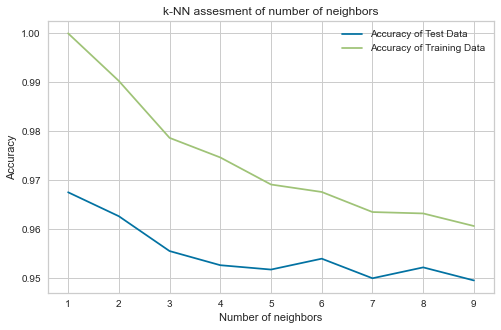

In [897]:
plt.figure(figsize=(8,5))
plt.title('k-NN assesment of number of neighbors')
plt.plot(neighbors, test_accuracy, label='Accuracy of Test Data')
plt.plot(neighbors, train_accuracy, label='Accuracy of Training Data')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

#### **Find Optimum K Value with Elbow Method**

In [898]:
error_rate = []
# Her bir error rate icin olusan k degeri bu listeye atilacak
# Will take some time
for i in range(1,10):
    
    model = KNeighborsClassifier(n_neighbors=i) # k= i
    model.fit(X_train,y_train)
    y_pred_i = model.predict(X_test)
    error_rate.append(np.mean(y_pred_i != y_test)) 

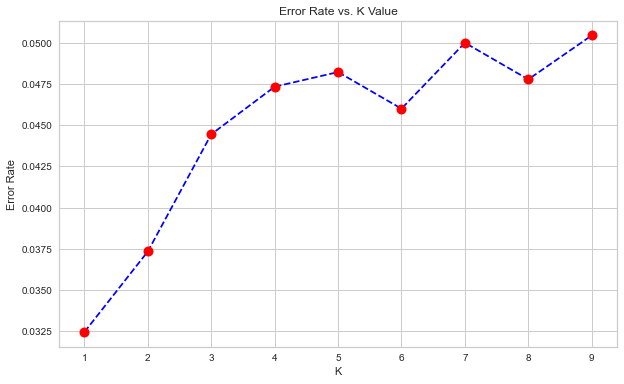

In [899]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),
         error_rate,
         color='blue', 
         linestyle='dashed', 
         marker='o',
         markerfacecolor='red', 
         markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate');

> Minimum Error rate ve maximum accuracy saglayan k=1 dir.

#### Tunning

In [900]:
# knn = KNeighborsClassifier()
# knn_params = {"n_neighbors": range(1,10,2)}

# knn_cv_model = GridSearchCV(knn, knn_params, cv=10).fit(X_train, y_train)

In [901]:
# knn_cv_model.best_params_

{'n_neighbors': 1}

> Hem elbow ile hem Grid Search ile optimum k=1 bulduk. Modeli k=1 ile egitiyoruz.

In [902]:
knn_tuned= KNeighborsClassifier(n_neighbors = 1).fit(X_train, y_train)
y_pred = knn_tuned.predict(X_test)

#### Evaluating Model Performance

In [903]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[3336   92]
[  54 1018]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3428
           1       0.92      0.95      0.93      1072

    accuracy                           0.97      4500
   macro avg       0.95      0.96      0.96      4500
weighted avg       0.97      0.97      0.97      4500



In [904]:
knn_accuracy = accuracy_score(y_test, y_pred)
knn_f1_score = f1_score(y_test, y_pred, average='weighted')
knn_recall = recall_score(y_test, y_pred, average='weighted')
print('knn_accuracy:',knn_accuracy,
      '\nknn_f1_score:',knn_f1_score,
      '\nknn_recall:',knn_recall)

knn_accuracy: 0.9675555555555555 
knn_f1_score: 0.9677476547869026 
knn_recall: 0.9675555555555555


In [905]:
knn_f1_true=float(classification_report(y_test, y_pred).split()[12])
knn_f1_true

0.93

### `Compare Models Accuracies & F1 Scores & Recall`

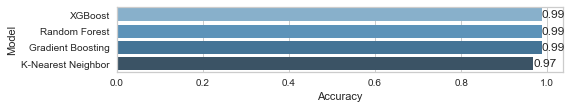

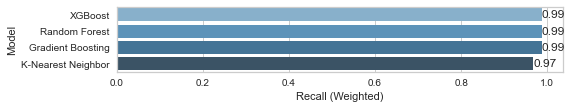

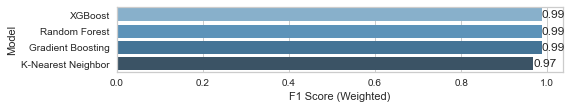

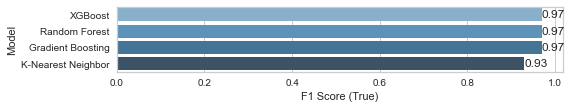

In [906]:
compare = pd.DataFrame({"Model": ["Random Forest", "XGBoost","Gradient Boosting","K-Nearest Neighbor"],
                        "Accuracy": [rfc_accuracy, xgb_accuracy, gbc_accuracy,knn_accuracy],
                        "F1 Score": [rfc_f1_score, xgb_f1_score, gbc_f1_score, knn_f1_score],
                        "Recall": [rfc_recall, xgb_recall, gbc_recall,knn_recall],
                        "F1 Score (True)": [rf_f1_true, xgb_f1_true, gbc_f1_true, knn_f1_true]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()    # get bar length
        ax.text(width,       # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
                '{:1.2f}'.format(width), # set variable to display, 2 decimals
                ha = 'left',   # horizontal alignment
                va = 'center')  # vertical alignment
    
plt.subplot(411)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

plt.subplot(412)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.xlabel('Recall (Weighted)')
plt.show()

plt.subplot(413)
compare = compare.sort_values(by="F1 Score", ascending=False)
ax=sns.barplot(x="F1 Score", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.xlabel('F1 Score (Weighted)')
plt.show()

plt.subplot(414)
compare = compare.sort_values(by="F1 Score", ascending=False)
ax=sns.barplot(x="F1 Score (True)", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

### Result
* F1 score is used in the case where we have skewed classes i.e one type of class examples more than the other type class examples.
* For Churn Analysis, `F1 score of True Class` is the most important parameter.
* As we can say, XGBoost and Random Forest Classifier with SMOTE algorithm are the best models when we looked at the `F1 score of True Class`

### Feature Importance for XGBoost

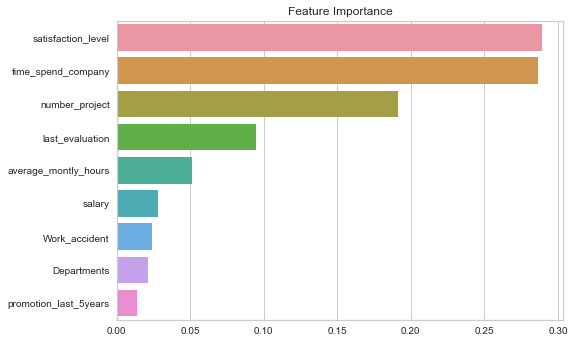

satisfaction_level      0.29
time_spend_company      0.29
number_project          0.19
last_evaluation         0.09
average_montly_hours    0.05
salary                  0.03
Work_accident           0.02
Departments             0.02
promotion_last_5years   0.01
dtype: float32

In [907]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.show()

feature_imp[:10]

### Feature Importance for Random Forest

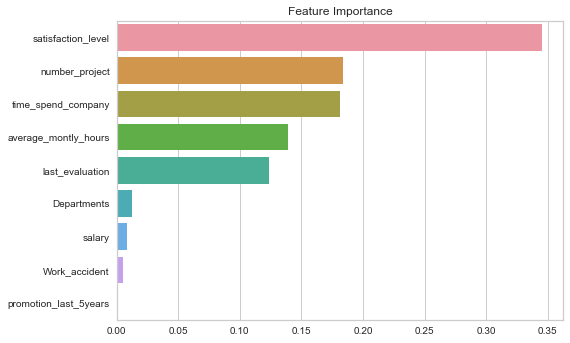

satisfaction_level      0.35
number_project          0.18
time_spend_company      0.18
average_montly_hours    0.14
last_evaluation         0.12
Departments             0.01
salary                  0.01
Work_accident           0.01
promotion_last_5years   0.00
dtype: float64

In [908]:
feature_imp = pd.Series(rf_model.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.show()

feature_imp[:10]

## 6. Model Deployement

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

### Save and Export the Model as .pkl

In [909]:
import pickle
pickle.dump(xgb_tuned,open("XGBoost.pkl","wb"))
pickle.dump(rf_model,open("RandomForest.pkl","wb"))

### Save and Export Variables as .pkl

In [910]:
xgb_model = pickle.load(open("XGBoost.pkl","rb"))
rf_model = pickle.load(open("RandomForest.pkl","rb"))

In [911]:
department_encode={'sales':7, 
                     'technical':9, 
                     'support':8, 
                     'IT':0, 
                     'product_mng':6, 
                     'marketing':5,
                     'RandD':1, 
                     'accounting':2, 
                     'hr':3, 
                     'management':4}

salary_encode = {'low':1,
                 'medium':2,
                 'high':3}

In [912]:
# my_dict = {'satisfaction_level':0.38,
#            'last_evaluation':0.53, 
#            'number_project':2,
#            'average_montly_hours':157,
#            'time_spend_company':3,
#            'Work_accident':0,
# #            'left':1
#            'promotion_last_5years':0,
#            'Departments':'sales', 
#            'salary':'low',
#             }

In [913]:
my_dict = {'satisfaction_level':0.15,
           'last_evaluation':0.44, 
           'number_project':3,
           'average_montly_hours':199,
           'time_spend_company':2,
           'Work_accident':0,
#            'left':0
           'promotion_last_5years':0,
           'Departments':'management', 
           'salary':'low',
            }

In [914]:
X = pd.DataFrame.from_dict([my_dict])
X[['salary','Departments']]=pd.concat([X.salary.map(salary_encode),X.Departments.map(department_encode)],axis=1)

In [915]:
prediction_XGB = xgb_model.predict(X)
prediction_XGB

array([0], dtype=int64)

In [916]:
print("The Churn : ",'Yes' if prediction_XGB[0] else 'No')

The Churn :  No


In [917]:
prob_XGB = xgb_model.predict_proba(X)
print(f'The Probability of the Customer Churn is %{round(prob_XGB[0][1]*100,1)}')

The Probability of the Customer Churn is %0.0


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___